In [ ]:
#3. Implement and demonstrate the following by importing the dataset from load_ dataset.
#a. Pandas library function for data analysis & manipulation
#b. Matplotlib library functions for data visualization

In [1]:
#import libraries and load dataset
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()

# Convert to pandas DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [2]:
#pandas-analysis
print(data.info())  
print(data.describe())  # count, mean, std, min, max, quartiles
print(data.isnull().sum())
print(data['target'].value_counts())
print(data.corr())    #correlation matrix
print(data.sort_values(by='sepal length (cm)').head())     #sort by sepal len

#pandas-manipulation
features = data[['sepal length (cm)', 'sepal width (cm)']]
print(features.head()) #selecting cols

filtered = data[data['sepal length (cm)'] > 5.0]
print(filtered.head())  #filtering rows

data['sepal area'] = data['sepal length (cm)'] * data['sepal width (cm)']
print(data.head()) #add new col

data_renamed = data.rename(columns={'sepal length (cm)': 'SepalLength', 'sepal width (cm)': 'SepalWidth'})
print(data_renamed.head()) #rename cols

grouped = data.groupby('target')['sepal area'].mean()
print(grouped) #grouping and aggregate

data_dropped = data.drop(columns=['sepal area'])
print(data_dropped.head())   #drop col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

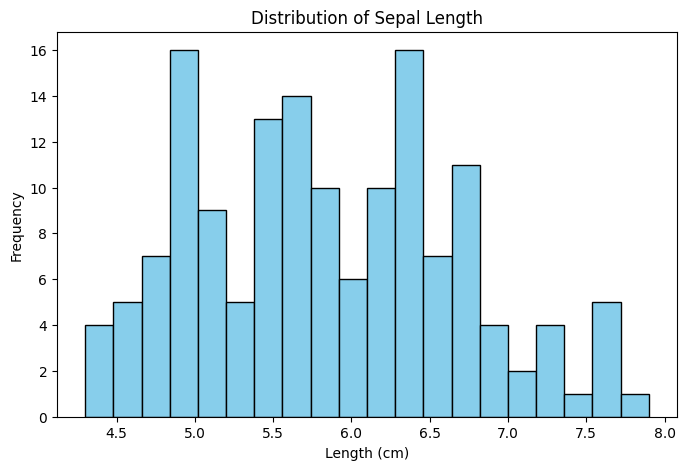

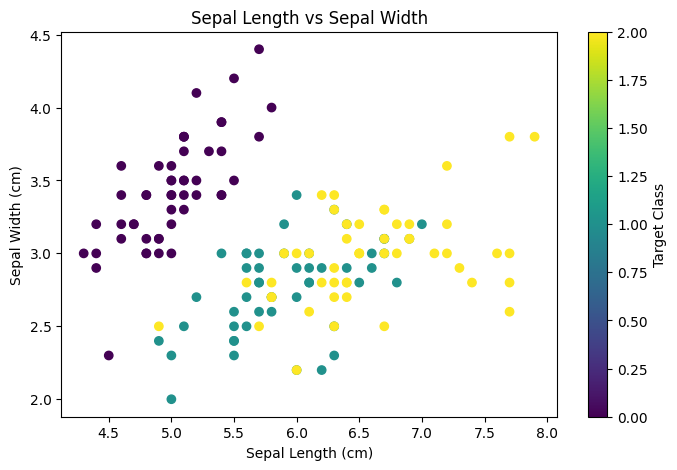

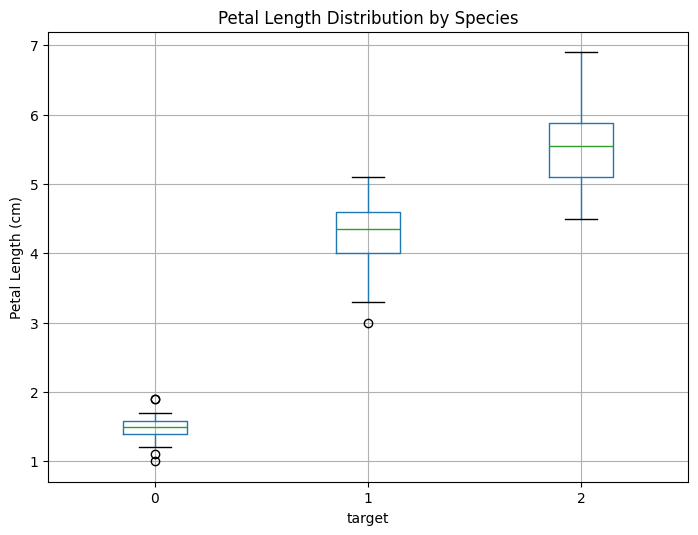

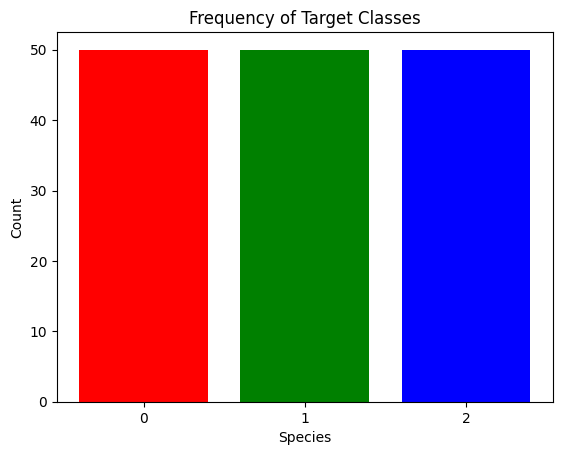

In [6]:
#matplotlib & Seaborn
import matplotlib.pyplot as plt

# 1. Histogram: See the distribution of a single feature
plt.figure(figsize=(8, 5))
plt.hist(data['sepal length (cm)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Length (cm)')
plt.ylabel('Frequency')
plt.show()


# 2. Scatter Plot: Relationship between two variables
plt.figure(figsize=(8, 5))
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['target'], cmap='viridis')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Target Class') # Shows which color represents which species
plt.show()

# 3. Box Plot: Compare feature spread across different target classes
data.boxplot(column='petal length (cm)', by='target', figsize=(8, 6))
plt.title('Petal Length Distribution by Species')
plt.suptitle('') # Removes the automatic subtitle
plt.ylabel('Petal Length (cm)')
plt.show()

# 4. Bar Chart: Visualizing value counts
counts = data['target'].value_counts()
plt.bar(counts.index.astype(str), counts.values, color=['red', 'green', 'blue'])
plt.title('Frequency of Target Classes')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()



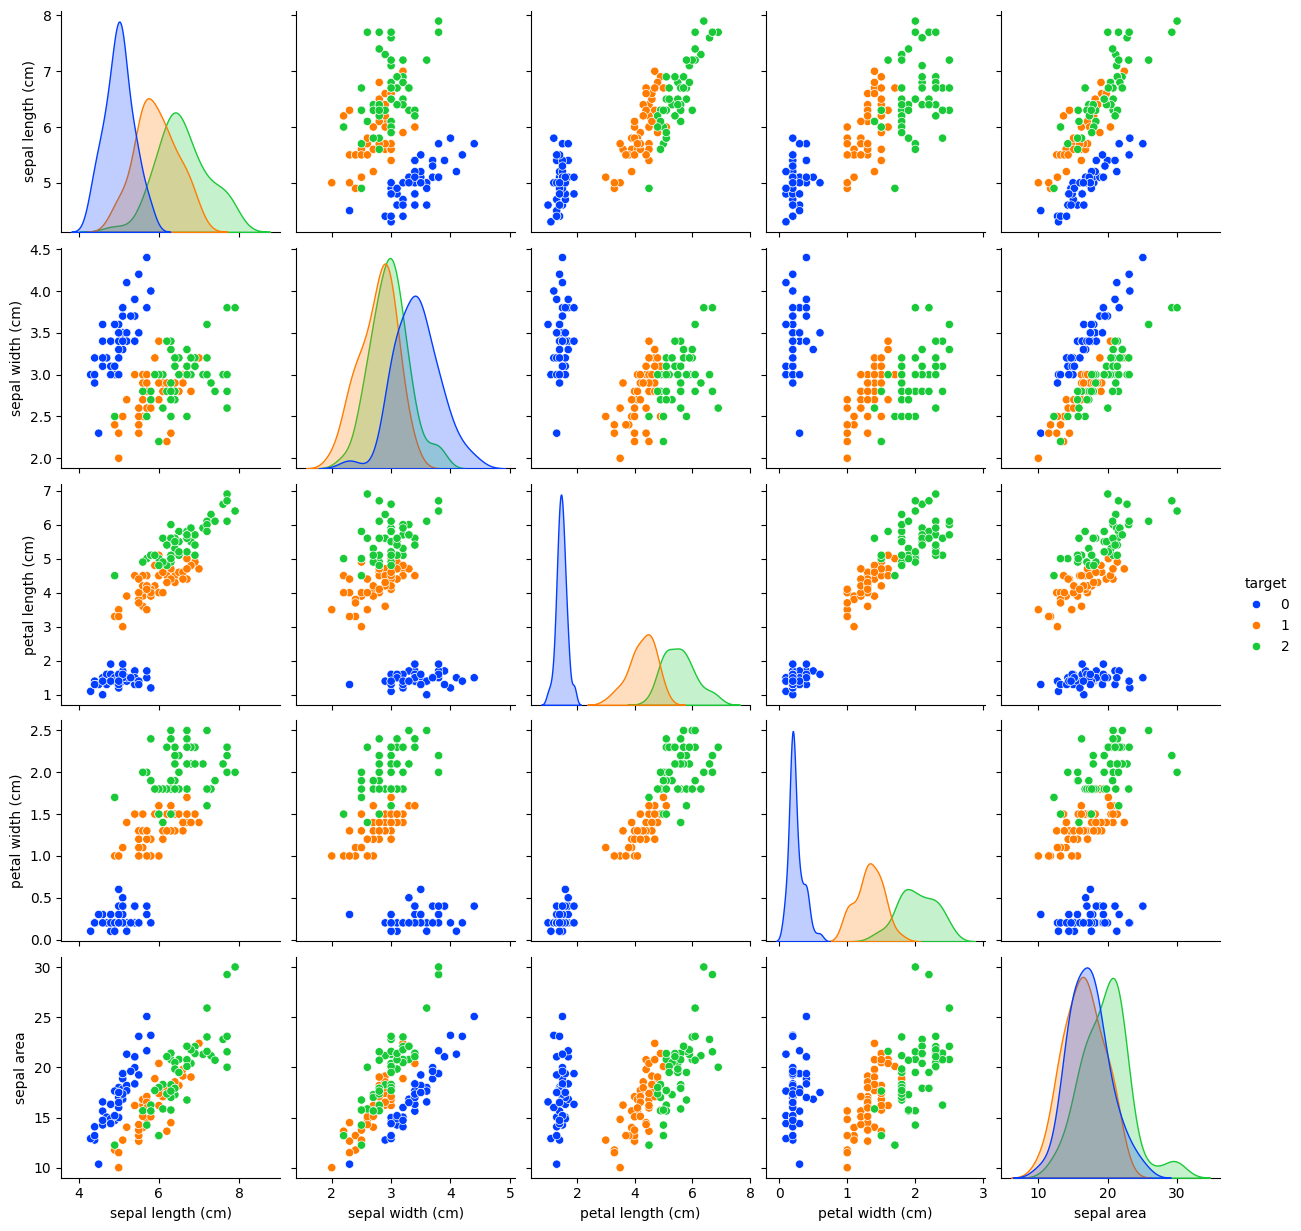

In [7]:
import seaborn as sns

# This one line replaces 10 separate plots
sns.pairplot(data, hue='target', palette='bright')
plt.show()